In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

In [55]:
data = 'owid-covid-data-large.csv'

In [56]:
# column names = iso_code	continent	location	date	total_cases	new_cases	new_cases_smoothed	total_deaths	new_deaths	new_deaths_smoothed	total_cases_per_million	new_cases_per_million	new_cases_smoothed_per_million	total_deaths_per_million	new_deaths_per_million	new_deaths_smoothed_per_million	reproduction_rate	icu_patients	icu_patients_per_million	hosp_patients	hosp_patients_per_million	weekly_icu_admissions	weekly_icu_admissions_per_million	weekly_hosp_admissions	weekly_hosp_admissions_per_million	total_tests	new_tests	total_tests_per_thousand	new_tests_per_thousand	new_tests_smoothed	new_tests_smoothed_per_thousand	positive_rate	tests_per_case	tests_units	total_vaccinations	people_vaccinated	people_fully_vaccinated	total_boosters	new_vaccinations	new_vaccinations_smoothed	total_vaccinations_per_hundred	people_vaccinated_per_hundred	people_fully_vaccinated_per_hundred	total_boosters_per_hundred	new_vaccinations_smoothed_per_million	new_people_vaccinated_smoothed	new_people_vaccinated_smoothed_per_hundred	stringency_index	population	population_density	median_age	aged_65_older	aged_70_older	gdp_per_capita	extreme_poverty	cardiovasc_death_rate	diabetes_prevalence	female_smokers	male_smokers	handwashing_facilities	hospital_beds_per_thousand	life_expectancy	human_development_index	excess_mortality_cumulative_absolute	excess_mortality_cumulative	excess_mortality	excess_mortality_cumulative_per_million

column_names = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million']
raw_dataset = pd.read_csv(data, names=column_names,
                          na_values='?', comment='\t',
                          sep=',')

/tmp/ipykernel_26202/3482583763.py:4: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_dataset = pd.read_csv(data, names=column_names,


In [57]:
dataset = raw_dataset.copy()

In [58]:
dataset.isna().sum()
dataset = dataset.dropna(axis=1, how='all')
dataset = dataset.dropna()

dataset = dataset.drop(['iso_code', 'continent', 'date', 'tests_units'], axis=1)

dataset = pd.get_dummies(dataset, columns=['location'], prefix='', prefix_sep='')


In [59]:
train_dataset = dataset.sample(frac=0.8, random_state=0)

In [60]:
test_dataset = dataset.drop(train_dataset.index)

In [61]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
location,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


In [62]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
#train_features=np.asarray(train_features).astype(np.float32)

print(train_features.tail())

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0  total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths   

   new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0  new_deaths_smoothed  total_cases_per_million  new_cases_per_million   

   new_cases_smoothed_per_million  total_deaths_per_million  ...  \
0  new_cases_smoothed_per_million  total_deaths_per_million  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0  male_smokers  handwashing_facilities  hospital_beds_per_thousand   

   life_expectancy  human_development_index  \
0  life_expectancy  human_development_index   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0  excess_mortality_cumulative_absolute  excess_mortality_cumulative   

   excess_mortality  excess_mortality_cumulative_per_million location  
0  excess_mortality  excess_mortality_cumulative_per_million        1  

[1 rows x 63 columns]


In [63]:
train_labels = train_features.pop('total_deaths_per_million')
test_labels = test_features.pop('total_deaths_per_million')
#train_labels=np.asarray(train_labels).astype(np.float32)
print(train_labels)

0    total_deaths_per_million
Name: total_deaths_per_million, dtype: object


In [64]:
train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
location,1.0,NaN


In [65]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [66]:
normalizer.adapt(np.array(train_features))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
print(normalizer.mean.numpy())

[[4.243e+04 1.347e+03 1.596e+03 4.426e+01 3.974e+02 1.312e+01 3.629e-01
  1.229e+04 4.795e+05 6.143e+00 1.375e-01 1.160e+04 1.320e-01 1.201e+02
  8.406e-02 7.774e+01 1.371e+08 1.979e+02 2.756e+01 6.063e+00 3.648e+00
  9.002e+03 1.175e+01 2.467e+02 7.343e+00 3.886e+00 3.095e+01 6.124e+01
  1.491e+00 7.101e+01 5.949e-02 5.734e-02 5.734e-02 4.341e-02 2.144e-02
  3.483e-02 5.091e-02 4.502e-02 4.823e-02 4.609e-02 6.002e-02 4.555e-02
  5.573e-02 5.627e-02 5.895e-02 5.949e-02 4.930e-02 5.198e-02 4.984e-02
  7.503e-03 8.574e-03 3.269e-02]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[7.80e+04 3.46e+03 8.60e+03 4.63e+02 6.05e+02 2.69e+01 3.59e+00 8.78e+03
  2.62e+05 2.04e+00 6.80e-02 7.50e+03 5.80e-02 2.45e+00 4.08e-01 8.24e+01
  1.29e+08 6.64e+01 2.93e+01 6.86e+00 4.32e+00 1.73e+04 2.50e+00 1.53e+02
  1.31e+01 6.90e+00 2.14e+01 8.78e+01 1.38e+00 7.50e+01 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00]]

Normalized: [[ 0.31  0.56  1.34  3.2   0.25  0.48  3.16 -0.1  -0.15 -0.35 -0.31 -0.12
  -0.34 -0.21  3.27  0.3  -0.03 -0.46  0.34  0.36  0.48  1.37 -0.7  -0.99
   2.36  1.08 -0.57  1.04 -0.08  0.75 -0.25 -0.25 -0.25 -0.21 -0.15 -0.19
  -0.23 -0.22 -0.23 -0.22  3.96 -0.22 -0.24 -0.24 -0.25 -0.25 -0.23 -0.23
  -0.23 -0.09 -0.09 -0.18]]


In [ ]:
handwash = np.array(train_features['handwashing_facilities'])

In [ ]:
handwash_normalizer = layers.Normalization(input_shape=[1, ], axis=None)

In [ ]:
handwash_normalizer.adapt(handwash)

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 36ms/step


array([[-0.196],
       [ 0.639],
       [ 1.276],
       [-2.876],
       [-0.101],
       [-0.321],
       [ 0.777],
       [ 0.81 ],
       [-0.74 ],
       [-1.199]], dtype=float32)

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


/home/emi/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


CPU times: user 7.07 s, sys: 788 ms, total: 7.85 s
Wall time: 6.03 s


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [total_deaths_per_million]')
  plt.legend()
  plt.grid(True)


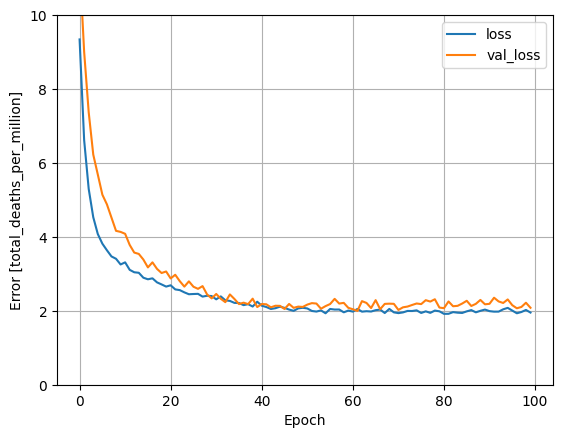

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

15/15 [==============================] - 0s 744us/step


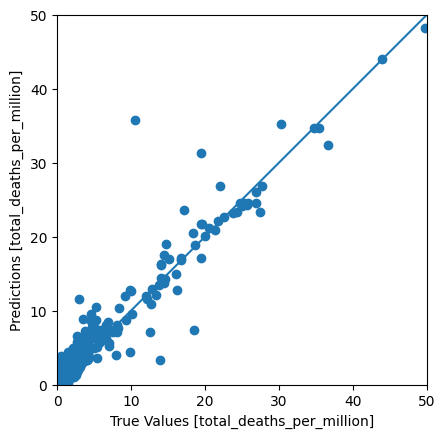

In [ ]:
test_predictions = linear_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [total_deaths_per_million]')
plt.ylabel('Predictions [total_deaths_per_million]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_14 (Normaliza  (None, 52)               105       
 tion)                                                           
                                                                 
 dense_29 (Dense)            (None, 64)                3392      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 7,722
Trainable params: 7,617
Non-trainable params: 105
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


/home/emi/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


CPU times: user 9.83 s, sys: 1.62 s, total: 11.4 s
Wall time: 7.27 s


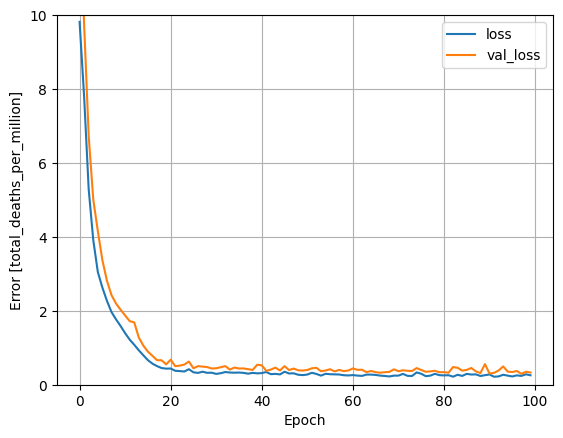

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

15/15 [==============================] - 0s 896us/step


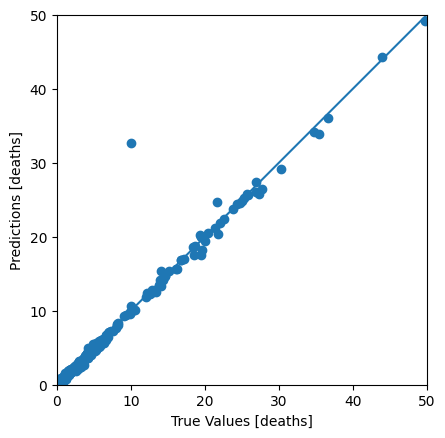

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [deaths]')
plt.ylabel('Predictions [deaths]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


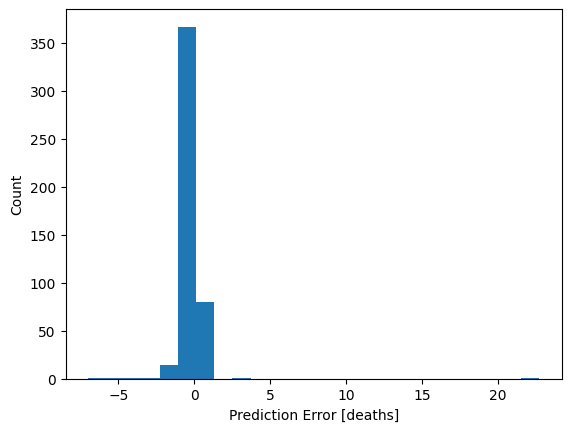

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [deaths]')
_ = plt.ylabel('Count')


In [ ]:
dnn_model.save('dnn_model')


INFO:tensorflow:Assets written to: dnn_model/assets
